In [1]:
! pip install scikit-learn==1.7.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 93.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
# filter warnings
warnings.filterwarnings("ignore")

In [4]:
# load data
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
# shape
df.shape

(100000, 9)

In [6]:
# desc
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
# distributions
num_cols = ["age", "bmi"]

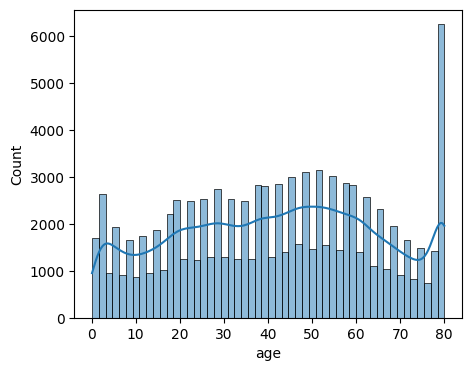

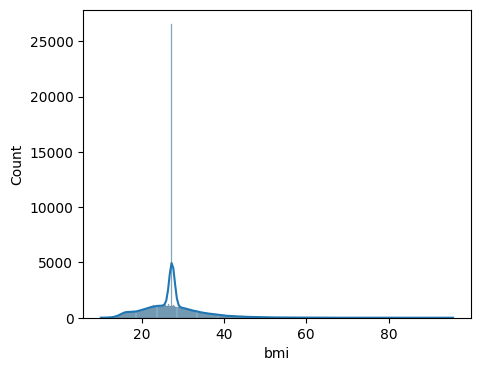

In [9]:
for col in num_cols:
    plt.figure(figsize = (5,4))
    sns.histplot(x = df[col], kde = True)

In [10]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [11]:
category_cols = ['hypertension', 'heart_disease', 'smoking_history', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

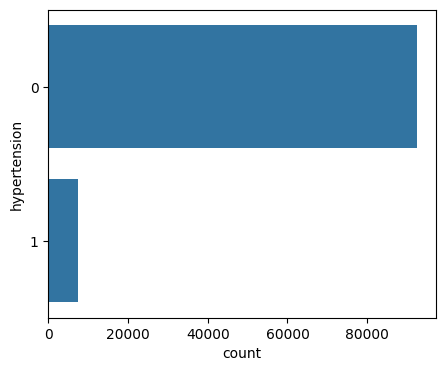

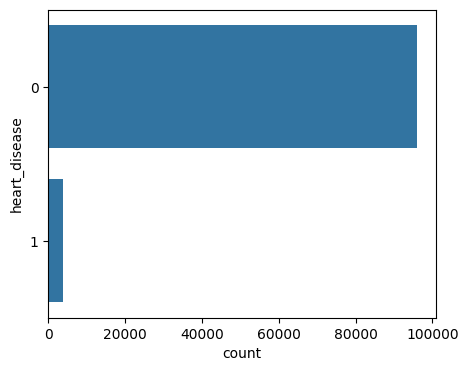

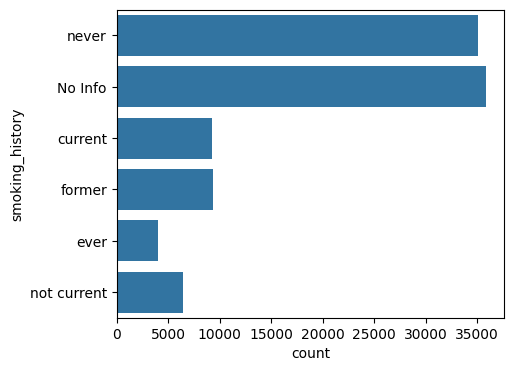

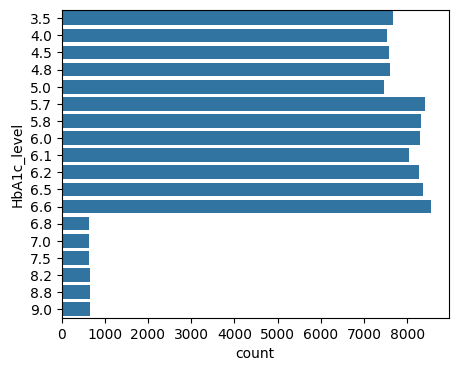

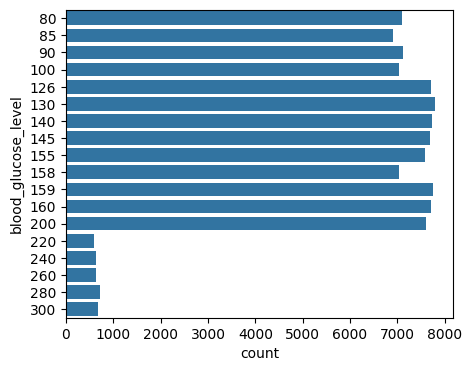

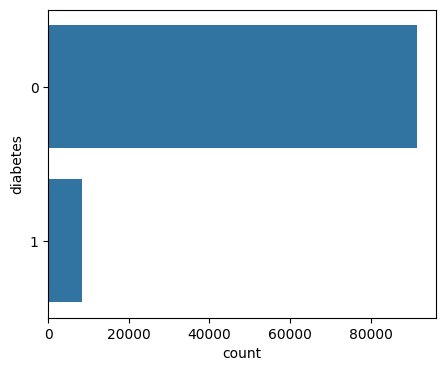

In [12]:
for col in category_cols:
    plt.figure(figsize = (5,4))
    sns.countplot(data = df, y = df[col])

In [13]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

<Axes: >

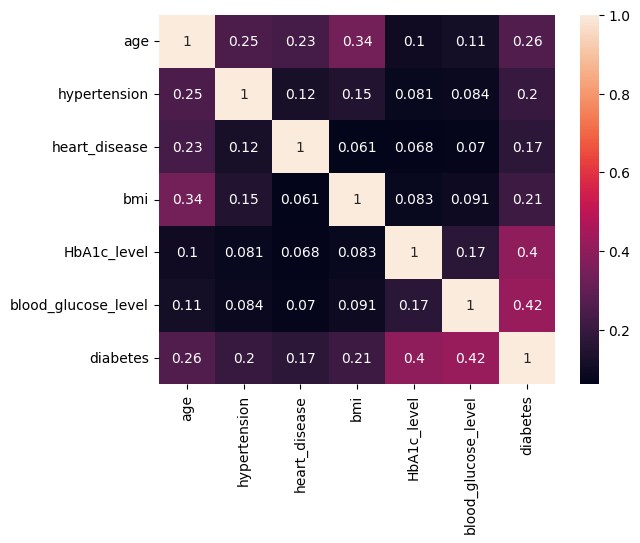

In [14]:
# correlation
sns.heatmap(df.corr(numeric_only = True), annot = True)

In [15]:
# null values
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [16]:
# duplicates
df.shape[0]

100000

In [17]:
df = df.drop_duplicates()

In [18]:
df.shape[0]

96146

In [19]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [20]:
df['gender'].value_counts()

,count
gender,
Female,56161
Male,39967
Other,18


In [21]:
df['smoking_history'].value_counts()

,count
smoking_history,
never,34398
No Info,32887
former,9299
current,9197
not current,6367
ever,3998


In [22]:
df['diabetes'].value_counts()

,count
diabetes,
0,87664
1,8482


In [23]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [24]:
# X and y
X = df.drop(columns = ['diabetes'], axis = 1)
y = df['diabetes']

In [25]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155


In [26]:
# encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [27]:
X['gender'] = encoder.fit_transform(X['gender'])

In [28]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,never,25.19,6.6,140
1,0,54.0,0,0,No Info,27.32,6.6,80
2,1,28.0,0,0,never,27.32,5.7,158
3,0,36.0,0,0,current,23.45,5.0,155
4,1,76.0,1,1,current,20.14,4.8,155


In [29]:
X = pd.get_dummies(X, columns = ['smoking_history'])

In [30]:
X = X.astype(int)

In [31]:
X.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80,0,1,25,6,140,0,0,0,0,1,0
1,0,54,0,0,27,6,80,1,0,0,0,0,0
2,1,28,0,0,27,5,158,0,0,0,0,1,0
3,0,36,0,0,23,5,155,0,1,0,0,0,0
4,1,76,1,1,20,4,155,0,1,0,0,0,0


In [32]:
X.shape[1]

13

In [33]:
# scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
X_scaled = scaler.fit_transform(X)

In [35]:
X_scaled

array([[-0.84345919,  1.6998527 , -0.29005038, ..., -0.32722066,
         1.33981505, -0.26630544],
       [-0.84345919,  0.54337667, -0.29005038, ..., -0.32722066,
        -0.74637167, -0.26630544],
       [ 1.18376945, -0.61309936, -0.29005038, ..., -0.32722066,
         1.33981505, -0.26630544],
       ...,
       [ 1.18376945,  1.07713484, -0.29005038, ...,  3.05604178,
        -0.74637167, -0.26630544],
       [-0.84345919, -0.79101875, -0.29005038, ..., -0.32722066,
         1.33981505, -0.26630544],
       [-0.84345919,  0.67681621, -0.29005038, ..., -0.32722066,
        -0.74637167, -0.26630544]])

In [36]:
type(X_scaled)

numpy.ndarray

In [37]:
# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, stratify = y, random_state = 42)

In [38]:
# mulitple models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

In [39]:
models = {
    'logisticRegression': LogisticRegression(max_iter = 1000),
    'knn': KNeighborsClassifier(n_neighbors = 5),
    'naiveBayes': GaussianNB(),
    'decisionTree': DecisionTreeClassifier(random_state = 42),
    'svm': SVC(kernel = 'rbf', probability = True)
}

In [40]:
results = []

In [41]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Acc': round(acc_score, 4),
        'F1': round(f1, 4)
    })

In [42]:
results

[{'Model': 'logisticRegression', 'Acc': 0.9571, 'F1': 0.7163},
 {'Model': 'knn', 'Acc': 0.9595, 'F1': 0.7294},
 {'Model': 'naiveBayes', 'Acc': 0.8986, 'F1': 0.5328},
 {'Model': 'decisionTree', 'Acc': 0.9444, 'F1': 0.6902},
 {'Model': 'svm', 'Acc': 0.9638, 'F1': 0.7452}]

In [43]:
results_df = pd.DataFrame(results, columns = ['Model', 'Acc', 'F1'])

In [44]:
results_df

,Model,Acc,F1
0,logisticRegression,0.9571,0.7163
1,knn,0.9595,0.7294
2,naiveBayes,0.8986,0.5328
3,decisionTree,0.9444,0.6902
4,svm,0.9638,0.7452


In [45]:
# XGBoost model
import xgboost as xgb

In [46]:
xgb_model = xgb.XGBClassifier(n_estimators = 100, use_label_encoder = False, eval_metric = 'logloss', learning_rate = 1, random_state = 42)

In [47]:
xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [48]:
xgb_pred = xgb_model.predict(X_test)

In [49]:
xgb_acc = accuracy_score(y_test, y_pred)
xgb_acc

0.9637706282069061

In [50]:
xgb_f1 = f1_score(y_test, y_pred)
xgb_f1

0.7451841014386735

In [51]:
xgb_results = {
    'Model': 'xgBoost',
    'Acc': round(xgb_acc, 4),
    'F1': round(xgb_f1, 4)
}

In [52]:
results_df = pd.concat([results_df, pd.DataFrame([xgb_results])], ignore_index=True)

In [53]:
results_df

,Model,Acc,F1
0,logisticRegression,0.9571,0.7163
1,knn,0.9595,0.7294
2,naiveBayes,0.8986,0.5328
3,decisionTree,0.9444,0.6902
4,svm,0.9638,0.7452
5,xgBoost,0.9638,0.7452


In [54]:
# best model
results_df.sort_values(by = 'Acc', ascending = False)[['Model', 'Acc', 'F1']]

,Model,Acc,F1
4,svm,0.9638,0.7452
5,xgBoost,0.9638,0.7452
1,knn,0.9595,0.7294
0,logisticRegression,0.9571,0.7163
3,decisionTree,0.9444,0.6902
2,naiveBayes,0.8986,0.5328


In [55]:
# cross validation
from sklearn.model_selection import cross_val_score

In [56]:
def cross_val_metrics(model, X, y, cv=5):
    acc_cross = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    f1_cross = cross_val_score(model, X, y, cv=cv, scoring='f1')

    print(f"{model.__class__.__name__} → Accuracy: {acc_cross.mean():.4f} ± {acc_cross.std():.4f} | F1: {f1_cross.mean():.4f} ± {f1_cross.std():.4f}")

In [57]:
# confusion matrix
from sklearn.metrics import confusion_matrix

In [59]:
# svm model
svm_pred = models['svm'].predict(X_test)
svm_cm = confusion_matrix(y_test, svm_pred)

<Axes: >

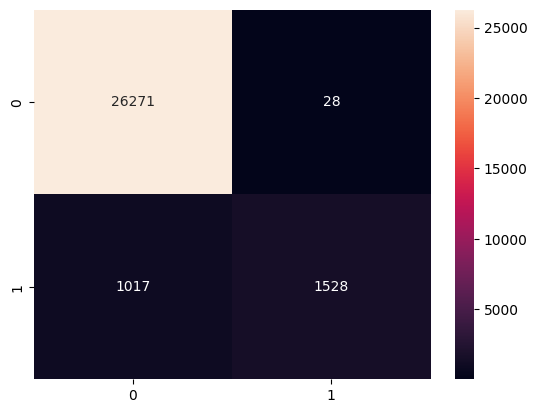

In [64]:
sns.heatmap(svm_cm, annot = True, fmt = 'd')

In [67]:
# xgboost model
xgb_pred = xgb_model.predict(X_test)
xgb_cm = confusion_matrix(y_test, xgb_pred)

<Axes: >

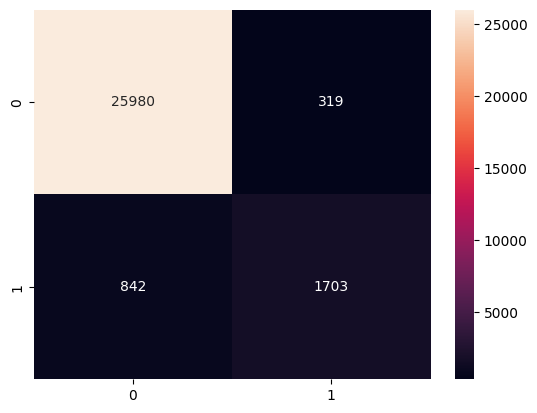

In [69]:
sns.heatmap(xgb_cm, annot = True, fmt = 'd')

In [75]:
# tuning xgb model
from sklearn.model_selection import GridSearchCV

In [76]:
xgb_param = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7],
}

In [82]:
xgb_grid = GridSearchCV(
    estimator = xgb_model,
    param_grid = xgb_param,
    scoring = 'f1',
    cv = 3
)

In [83]:
xgb_grid.fit(X_train, y_train)

,estimator,"XGBClassifier...state=42, ...)"
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [100, 200]}"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [84]:
xgb_grid.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}

In [85]:
xgb_grid.best_score_

np.float64(0.7759601673837307)

In [88]:
best_xgb_model = xgb_grid.best_estimator_

In [89]:
best_xgb_pred = best_xgb_model.predict(X_test)

In [91]:
accuracy_score(y_test, best_xgb_pred)

0.9664401608653446

In [92]:
f1_score(y_test, best_xgb_pred)

0.7699619771863118

In [93]:
best_params = xgb_grid.best_params_

In [94]:
best_params

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}

In [95]:
xgb_model_final = xgb.XGBClassifier(
    n_estimators = best_params['n_estimators'],
    learning_rate = best_params['learning_rate'],
    max_depth = best_params['max_depth'],
    use_label_encoder = False,
    eval_metric = 'logloss',
    random_state = 42
)

In [96]:
xgb_model_final.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [97]:
y_pred_final = xgb_model_final.predict(X_test)

In [105]:
# before tuning xgBoost
results_df[results_df['Model'] == 'xgBoost']

,Model,Acc,F1
5,xgBoost,0.9638,0.7452


In [106]:
# after tuning
print(accuracy_score(y_test, y_pred_final))
print(f1_score(y_test, y_pred_final))

0.9664401608653446
0.7699619771863118
